In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import ShipDetection
from keras.models import load_model
import glob

In [8]:
model = load_model("model_jaccard", custom_objects = {"jacard_coef_loss":ShipDetection.jacard_coef_loss,"jacard_coef":ShipDetection.jacard_coef})

In [9]:
def read_predict_display(path):
    pic = imread(path)/255
    res = model.predict(np.array([pic]))
    mask = np.rint(np.array(res[0])).reshape((256, 256))
    newPic = ShipDetection.applyMask(path, mask)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax1.imshow(pic)
    ax2.imshow(mask)
    ax3.imshow(newPic)
    return (mask,newPic)

In [29]:
batch_size = 5
paths = glob.glob("data/airbus-ship-detection/test_v2/*.jpg")
r = np.random.randint(0,len(paths)-batch_size,(batch_size))
batch = np.take(paths,r)
# path = "data/airbus-ship-detection/test_v2/222937f87.jpg"

1/1 [==============================] - 0s 18ms/step


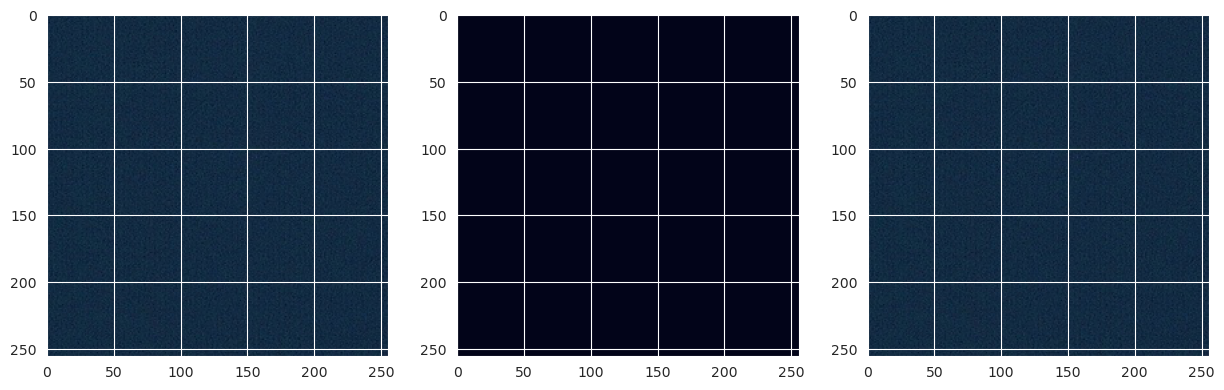

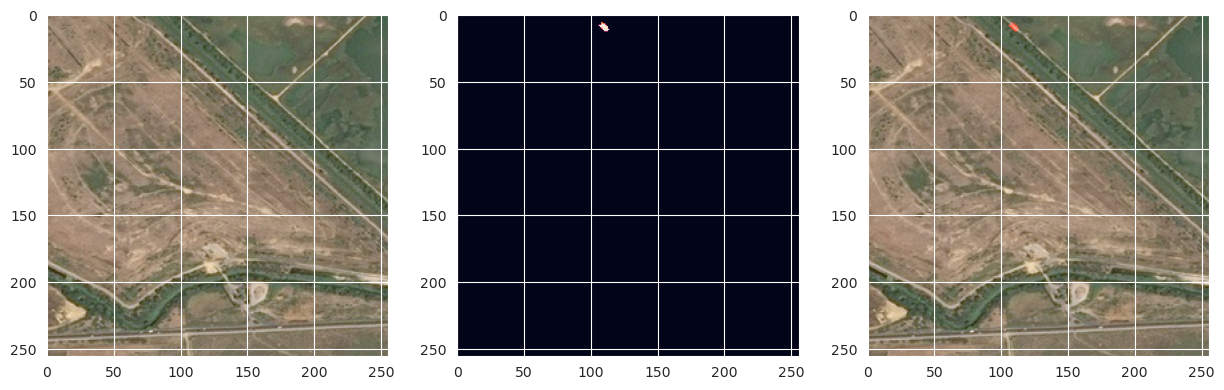

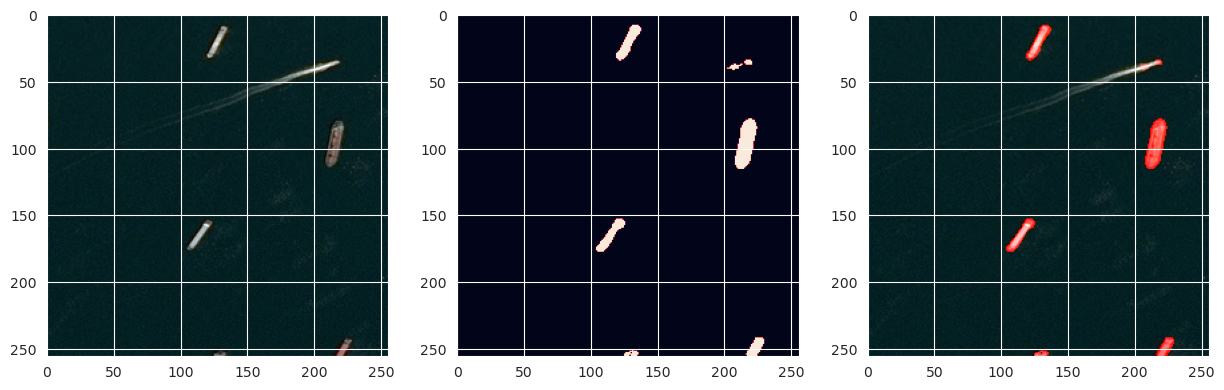

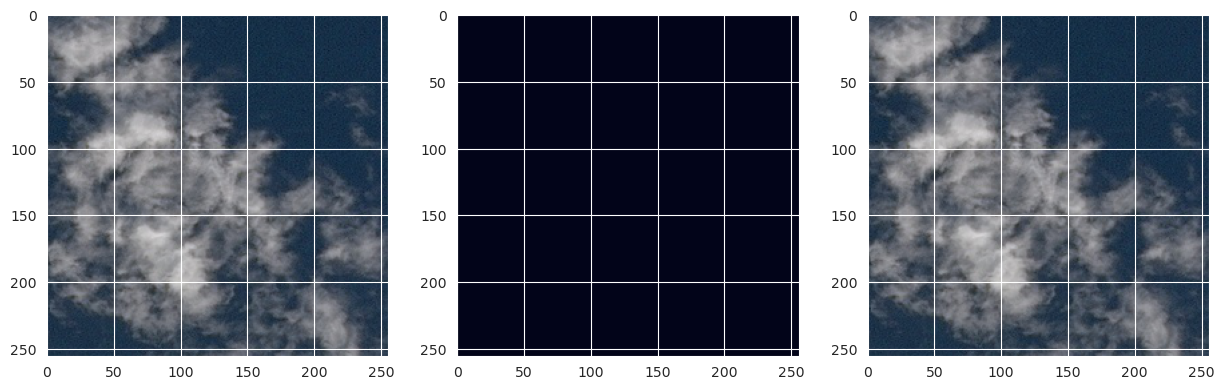

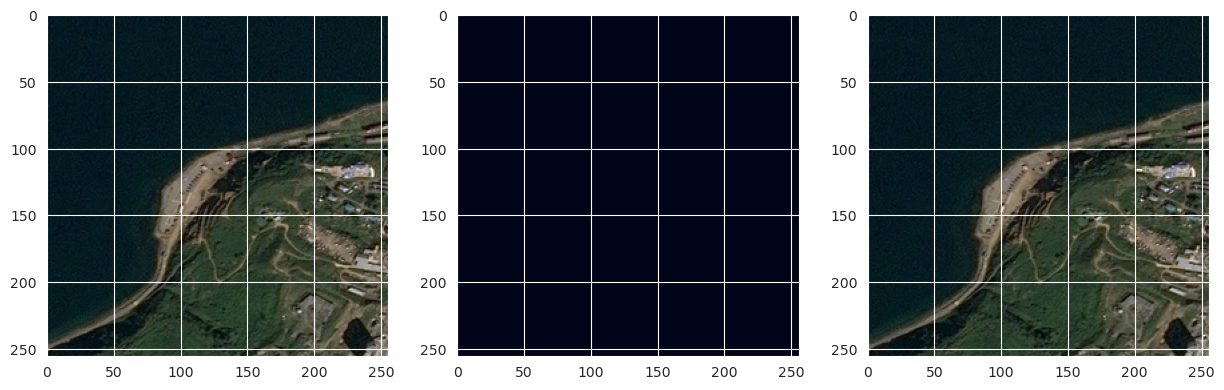

In [30]:
for path in batch:
    read_predict_display(path)

In [88]:
sample_csv = pd.read_csv("data/airbus-ship-detection/sample_submission_v2.csv")
submission_csv = sample_csv.drop_duplicates(subset="ImageId")

In [89]:
for i in submission_csv.index.to_numpy():
    pic = imread("data/airbus-ship-detection/test_v2/"+submission_csv["ImageId"][i])/255
    res = model.predict(np.array([pic]))
    mask = np.rint(np.array(res[0])).reshape((256, 256))
    submission_csv["EncodedPixels"][i] = ShipDetection.rle_encode(mask)
print(submission_csv)

1/1 [==============================] - 0s 20ms/step
             ImageId                                      EncodedPixels
0      00002bd58.jpg                                                   
1      00015efb6.jpg                                                   
2      00023d5fc.jpg                                                   
3      000367c13.jpg                               7375 3 7631 4 7887 3
4      0008ca6e9.jpg                                                   
...              ...                                                ...
15601  ffdb3cda6.jpg    30368 2 33702 3 33957 4 34212 5 34468 4 34724 3
15602  ffe3857eb.jpg  32487 1 32743 3 32997 5 33249 4 33254 3 33504 ...
15603  ffeb765e8.jpg  31033 3 31287 7 31542 9 31796 13 32052 12 3230...
15604  ffeba1475.jpg            45059 4 45315 5 45571 5 45827 4 46084 3
15605  fff0fd44f.jpg                                                   

[15606 rows x 2 columns]
